# CS 4501 Algorithmic Economics - Project 2

### Task I: Uncoupled No-Regret Learning Dynamics under Full Information

In [64]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

#### Question (a) - Pennies game

In [65]:
# An example template of the Multiplicative Weight Update Algorithm. You DO NOT have to use this template

# ------- Multiplicative Weight Update Algorithm -------#
def MWU(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (you may use any data struct):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 

    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):

        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
        # Simple matrix operations can be used here

        #sum of weights
        sum_w_a = np.sum(w_a)
        sum_w_b = np.sum(w_b)

        #probability
        p_a = w_a/sum_w_a #normalizing
        p_b = w_b/sum_w_b

        #adding probabilities
        sum_p_a += p_a[0]
        sum_p_b += p_b[0]
        
        # cost vector
        cost_a = np.matmul(M_a, p_b)
        cost_b = np.matmul(M_b.T, p_a)

        #updating weights
        w_a = np.multiply(w_a, np.ones(k) - epsilon*cost_a)
        w_b = np.multiply(w_b, np.ones(k) - epsilon*cost_b)
        
        # avg convergence
        avg_conv_a[t] = sum_p_a/(t+1)
        avg_conv_b[t] = sum_p_b/(t+1)

        # last convergence
        last_conv_a[t] = p_a[0]
        last_conv_b[t] = p_b[0]
        
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

In [66]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

In [67]:
def avg_conv(avg_conv_a, avg_conv_b):
    x = list(range(0, 3000))
    plt.plot(avg_conv_a, avg_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Avg game convergence")

In [68]:
def last_conv(last_conv_a, last_conv_b):
    x = list(range(0, 3000))
    plt.plot(last_conv_a, last_conv_b)
    plt.xlabel("Player A")
    plt.ylabel("Player B")
    plt.title("Avg game convergence")

**Choice 1: epsilon = 1/2**

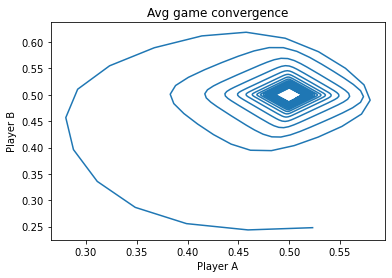

In [70]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

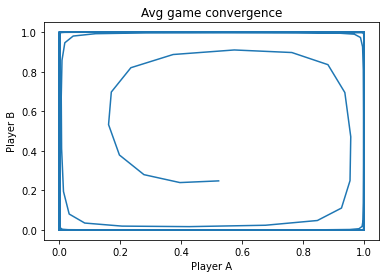

In [71]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

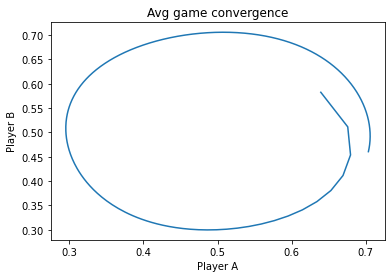

In [72]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

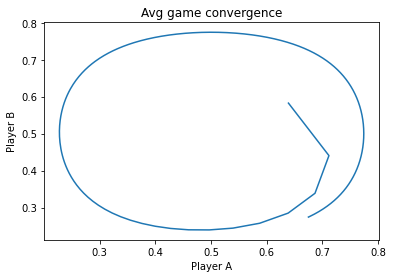

In [73]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

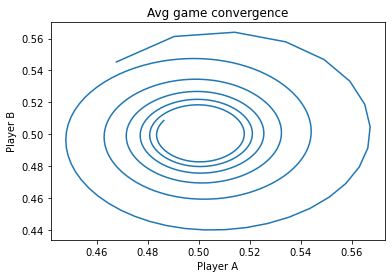

In [74]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

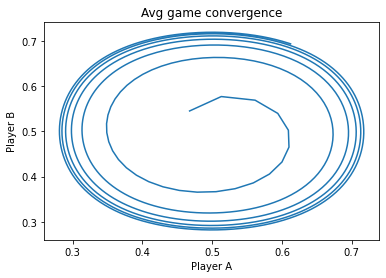

In [75]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

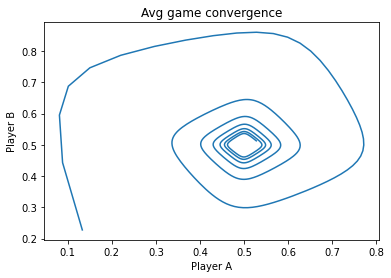

In [76]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

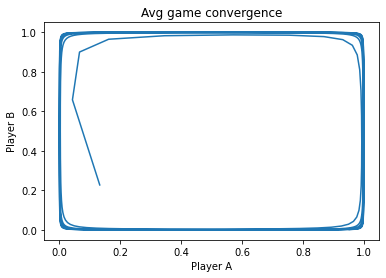

In [77]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

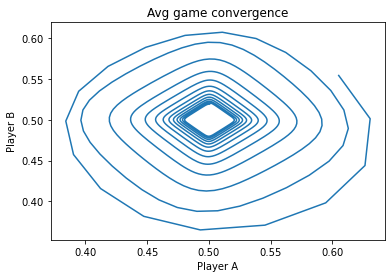

In [78]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

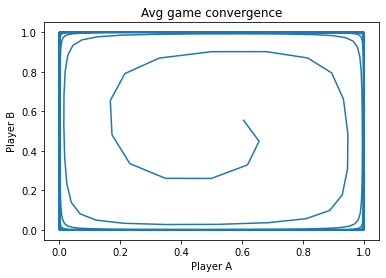

In [79]:
last_conv(last_conv_a, last_conv_b)

#### Question (b) - Rock-paper-scissors game

In [80]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

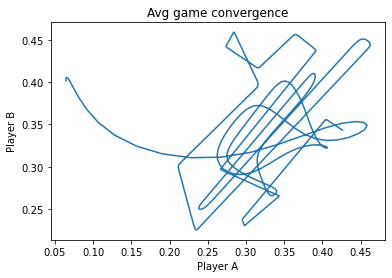

In [81]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

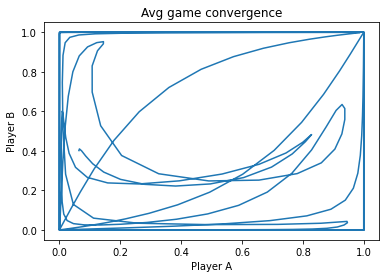

In [82]:
last_conv(last_conv_a, last_conv_b)

**Choice 2: epsilon = 1/t**

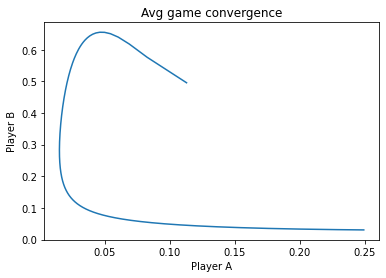

In [83]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

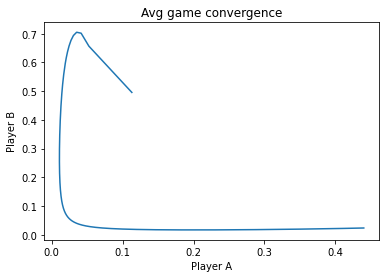

In [84]:
last_conv(last_conv_a, last_conv_b)

**Choice 3: epsilon = 1/(t^2/3)**

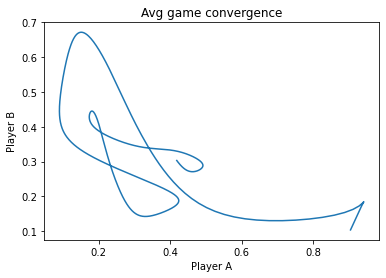

In [90]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

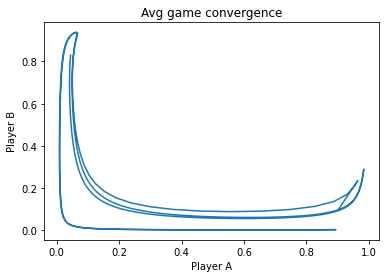

In [91]:
last_conv(last_conv_a, last_conv_b)

**Choice 4: 1/sqrt(t)**

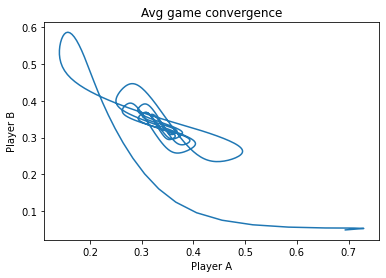

In [93]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

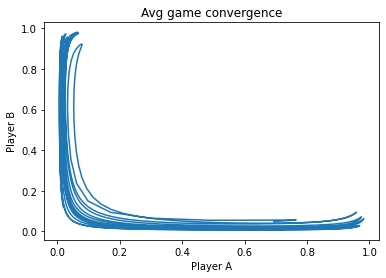

In [94]:
last_conv(last_conv_a, last_conv_b)

**Choice 5: epsilon = 1/(t^(1/3))**

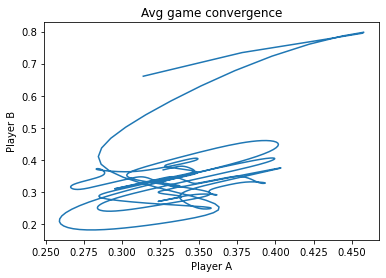

In [95]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 
avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = MWU(M_a, M_b, compute_epsilon)
avg_conv(avg_conv_a, avg_conv_b)

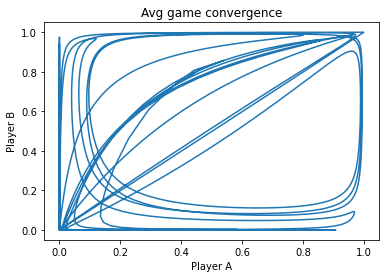

In [96]:
last_conv(last_conv_a, last_conv_b)

#### Question (c)

In [74]:
# A function template to construct payoff matrices for the DIR game
# You DO NOT have to use this template
def construct_DIR(K, c):
    rho = max(K, c)
    M_a = np.zeros((K, K))
    M_b = np.zeros((K, K))
    
    for i in range(K):
        for j in range(K):
            if i <= (j+1):
                # something happens here
            else:
                # something happens here
                
            if j <= i:
                # something happens here
            else:
                # something happens here
    return M_a, M_b

**Choice 1: epsilon = 1/2**

In [295]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function MWU, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [300]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [83]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function MWU, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [310]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function MWU, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [315]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function MWU, draw plots -------------# 


### Task II: Uncoupled No-Regret Learning Dynamics under Bandit Information

In [349]:
# An example template of the Multiplicative Weight Update Algorithm. 
# You DO NOT have to use this template

# ------- EXP3 Algorithm -------#
def EXP3(M_a, M_b, compute_epsilon, T = 3000):
    """
    Inputs:
        M_a: the k by k payoff matrix for player A, where k is the number of strategies: M_a[i,j] - the utility of A where A plays i and B plays j
        
        M_b: the k by k payoff matrix for player B, where k is the number of strategies: M_b[i,j] - the utility of B where A plays i and B plays j
        
        compute_epsilon: the function that computes epsilon
        
        T: the number of iterations. Default is 3000
        
    Output (not using dict here :-D ):
        avg_conv_a: the avg convergence seqeunce of A
        avg_conv_b: the avg convergence seqeunce of B
        last_conv_a: the last convergence seqeunce of A
        last_conv_b: the last convergence seqeunce of B
    """
    
    # The number of strategies
    k = M_a.shape[0]
    
    # The initial weight matrix for player A and B: w_a[i] - the weight of strategy i for player A
    w_a = np.array([random.uniform(0, 1) for _ in range(k)])
    w_b = np.array([random.uniform(0, 1) for _ in range(k)])
    
    # The convergence seqeunces
    avg_conv_a, avg_conv_b, last_conv_a, last_conv_b = ([None] * T for i in range(4)) 
    
    # Sum of probability (used to compute average convergence sequences)
    sum_p_a = 0.0
    sum_p_b = 0.0
    
    # The game starts
    for t in range(T):
        # Compute epsilon
        epsilon = compute_epsilon(t)
        
        # ---------- Fill out the details --------------# 
    
    return avg_conv_a, avg_conv_b, last_conv_a, last_conv_b

#### Question (a) - Pennies game

In [81]:
# Example payoff matrices for pennies game. 0 - head; 1 - tail
M_a = np.array([[-1, 1], [1, -1]])
M_b = np.array([[1, -1], [-1, 1]])

**Choice 1: epsilon = 1/2**

In [82]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [251]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [258]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [268]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [271]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 


#### Question (b) - Rock-paper-scissors game

In [294]:
# Example payoff matrices for RPS game. 0 - rock; 1 - paper; 2 - scissors
M_a = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])
M_b = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

**Choice 1: epsilon = 1/2**

In [295]:
# Choice 1: epsilon = 1/2
def compute_epsilon(t):
    return 0.5

# -------- Call function EXP3, draw plots -------------# 


**Choice 2: epsilon = 1/t**

In [300]:
# Choice 2: epsilon = 1/t
def compute_epsilon(t):
    return float(1/(t+1))

# -------- Call function EXP3, draw plots -------------# 


**Choice 3: epsilon = 1/(t^2/3)**

In [83]:
# Choice 3: epsilon = 1/(t^2/3)
def compute_epsilon(t):
    return float(1/((t+1)**(2/3)))

# -------- Call function EXP3, draw plots -------------# 


**Choice 4: 1/sqrt(t)**

In [310]:
# Choice 4: epsilon = 1/sqrt(t)
def compute_epsilon(t):
    return float(1/math.sqrt(t+1))

# -------- Call function EXP3, draw plots -------------# 


**Choice 5: epsilon = 1/(t^(1/3))**

In [315]:
# Choice 5: epsilon = 1/(t^(1/3))
def compute_epsilon(t):
    return float(1/((t+1)**(1/3)))

# -------- Call function EXP3, draw plots -------------# 
